In [1]:
from ctraptools.analysis.trace import Trace
from ctraptools.utils.traceutils import get_average_timestep
from lumicks import pylake
from scipy.signal import medfilt

import math
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Setting parameters
fpath = "/Users/sc13967/Documents/People/Alex Hughes-Games/20230120-135230 Kymograph 4 H119A trans, F.h5"
T=293 # Temperature for WLC model (K)
P=51.35E-9 # Persistence length (m)
win_w_s = 0.1 # Filter window size (s)

In [3]:
h5_file = pylake.File(fpath)

time_ns = h5_file['Force LF']['Trap 2'].timestamps
time_s = (time_ns - time_ns[0])*1E-9
force_N = h5_file['Force LF']['Trap 2'].data*1E-12
dist_m = h5_file['Distance']['Distance 1'].data*1E-6

trace = Trace(time=time_s,force=force_N,distance=dist_m)


In [4]:
# Getting trace just around force event of interest
trace_window = trace.extract_time_window(time_start=40,time_end=60)


In [5]:
# Estimate contour length from distance and force
L = trace_window.estimate_contour_length(T=293,P=51.35E-9)

/Users/sc13967/Documents/Programming/Python/ctraptools/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


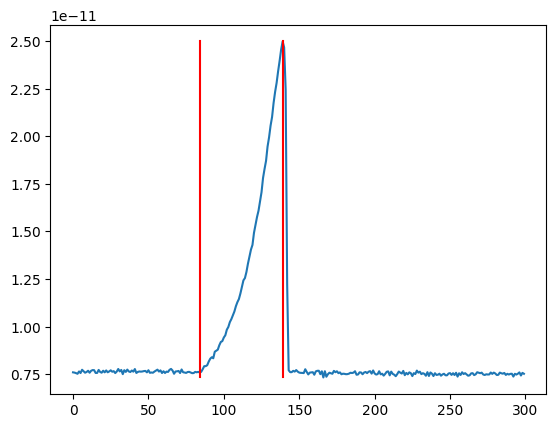

In [6]:
# Finding start and end of peak
res = trace_window.find_force_event()

x_min = res[1]
x_max = res[2]

y_min = min(trace_window.get_force())
y_max = max(trace_window.get_force())

plt.plot(trace_window.get_force())
plt.plot((x_min,x_min),(y_min,y_max),'r')
plt.plot((x_max,x_max),(y_min,y_max),'r')


In [7]:
# Applying 1D median filter
dt = get_average_timestep(time_ns)

win_w_f = math.ceil(win_w_s/dt)
win_w_f = win_w_f + 1 if win_w_f % 2 == 0 else win_w_f

L_filt = medfilt(L,win_w_f)

In [8]:
# Getting instantaneous rate of change of contour length
dLdt = np.diff(L_filt)/np.diff(trace_window.get_time())

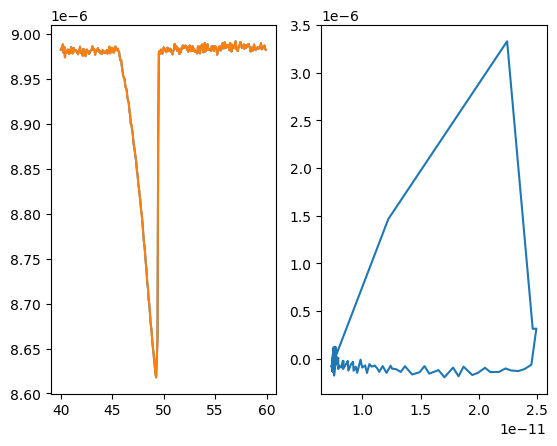

In [9]:
# Plotting
win_time_s = trace_window.get_time()
win_force_N = trace_window.get_force()

# Estimated contour length vs time
plt.subplot(1,2,1)
plt.plot(win_time_s,L)
plt.plot(win_time_s,L_filt)

# Instantaneous rate
plt.subplot(1,2,2)
plt.plot(win_force_N[:-1],dLdt)

plt.show()